### TIENDA COSMETICA CARRITO
#### PySpark
Este proyecto tanta de realizar consultas sobre 2GB de datos de una tienda de cosmetica en el que se han realizado una serie de compras por sus clientes desde Octubre hasta Febrero. Contiene **20.692.840** de datos. Vamos a realizar consultas sobre que productos se añaden conjuntamente en el carrito para poder hacer sugerencias para marketing digital o bussines inteligence.

In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\spark\\spark-2.4.3-bin-hadoop2.7'

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [3]:
spark = SparkSession.builder.appName('Cosmetica.com').getOrCreate()

In [4]:
df2 = spark.read.options(header='True', inferSchema='True').csv('C:/Users/USUARIO/Desktop/CursoML/Data/TiendaCosme/*.csv')

In [5]:
# Sacamos los productos comprados
productos = df2.select('product_id').filter("event_type='cart'")
productos.show()

+----------+
|product_id|
+----------+
|      4958|
|   5629988|
|      5335|
|   5755170|
|   5755170|
|   5755170|
|   5761411|
|   5761411|
|   5904369|
|   5600449|
|   5666749|
|   5862564|
|   5700046|
|   5700046|
|   5862313|
|   5798924|
|   5810157|
|   5693501|
|   5693501|
|   5860196|
+----------+
only showing top 20 rows



In [6]:
# Sacamos todas las sesiones usuario que han añadido ese producto '4870' al carrito
sesiones = df2.select(['user_session']).filter("event_type='cart' AND product_id='4870'").distinct()
sesiones.show()

+--------------------+
|        user_session|
+--------------------+
|157ec422-5c4c-c22...|
|6d7f10ee-36d8-436...|
|ef681d16-4684-43a...|
|2762a13f-b58e-429...|
|18fae8be-b53d-442...|
|f615d5eb-d2c4-48a...|
|e187ecba-3b15-45d...|
|2d8d1553-3100-4e1...|
|376908d6-8e28-4bb...|
|e92f8487-5cc2-47c...|
|11b16bf2-d284-0e0...|
|de95329f-d211-472...|
|e4fd235f-bd1e-4bd...|
|1f3cd197-e5a3-433...|
|bc632160-59fb-44f...|
|8e77880a-516f-49b...|
|9ce2aa95-da8b-4b6...|
|2ccde5c4-fac3-4b7...|
|98e65a1d-bc8f-460...|
|de26ba7b-b6c4-4f6...|
+--------------------+
only showing top 20 rows



In [7]:
# Sacamos los productos id que se han añadido conjuntamente con nuestro producto seleccionado en las mismas sesiones de usuarios
prod_conjunt = df2.select(['product_id']).filter("event_type='cart' AND product_id<>'4870'").filter(df2["user_session"].isin(sesiones["user_session"]))
prod_conjunt.show()

+----------+
|product_id|
+----------+
|      4958|
|   5629988|
|      5335|
|   5755170|
|   5755170|
|   5755170|
|   5761411|
|   5761411|
|   5904369|
|   5600449|
|   5666749|
|   5862564|
|   5700046|
|   5700046|
|   5862313|
|   5798924|
|   5810157|
|   5693501|
|   5693501|
|   5860196|
+----------+
only showing top 20 rows



In [8]:
# Se han añadido al carrito conjuntamente con el producto id 4870 un total de 5.764.313 productos
prod_conjunt.count()

5764313

In [9]:
# Los agrupamos por su id y conteamos las veces que aparecen en nuestra consulta para su analisis
prod_conju_agrup = prod_conjunt.groupBy('product_id').count()
prod_conju_agrup.show()

+----------+-----+
|product_id|count|
+----------+-----+
|   5657304|   83|
|   5815137|  153|
|   5809871| 3989|
|   5834157|  660|
|   5908237|   95|
|   5826154|  390|
|   5670719|  225|
|   5900643|  192|
|   5574996|  125|
|   5863096|  637|
|   5797144|  123|
|   5885863| 1620|
|   5742957| 2040|
|   5882575|  318|
|   5893679|  474|
|   5814871|  282|
|   5649465|  155|
|   5896615|  425|
|   5868397|   29|
|   5816884|   33|
+----------+-----+
only showing top 20 rows



In [10]:
# Vamos a sacar solo los 10 productos mas comprados conjuntamente con nuestro producto id 4870 para hacer sugerencias a los clientes
prod_conju_agrup_10 = prod_conju_agrup.sort(desc("count"))
prod_conju_agrup_10.show()

+----------+-----+
|product_id|count|
+----------+-----+
|   5700037|28333|
|   5809910|28019|
|   5802432|27164|
|   5854897|25689|
|   5815662|17854|
|   5686925|17287|
|   5700046|14033|
|   5809912|13368|
|   5836522|12489|
|   5751422|11847|
|      5304|11499|
|   5700035|11200|
|   5843836|11101|
|   5751383|10567|
|   5849033|10015|
|   5792800| 8821|
|   5809911| 8694|
|   5816170| 7837|
|   5776130| 7287|
|   5700039| 7162|
+----------+-----+
only showing top 20 rows



In [11]:
### Mejor forma para sacar los 10 primeros mas vendidos
pro10 = prod_conju_agrup_10.limit(10)
pro10.show()

+----------+-----+
|product_id|count|
+----------+-----+
|   5700037|28333|
|   5809910|28019|
|   5802432|27164|
|   5854897|25689|
|   5815662|17854|
|   5686925|17287|
|   5700046|14033|
|   5809912|13368|
|   5836522|12489|
|   5751422|11847|
+----------+-----+



In [12]:
import pandas as pd
path = "C:/Users/USUARIO/Desktop/Prueba02/"

In [13]:
pro10.toPandas().to_csv( path + "Prod"+ str(4870) + ".csv", header=True)

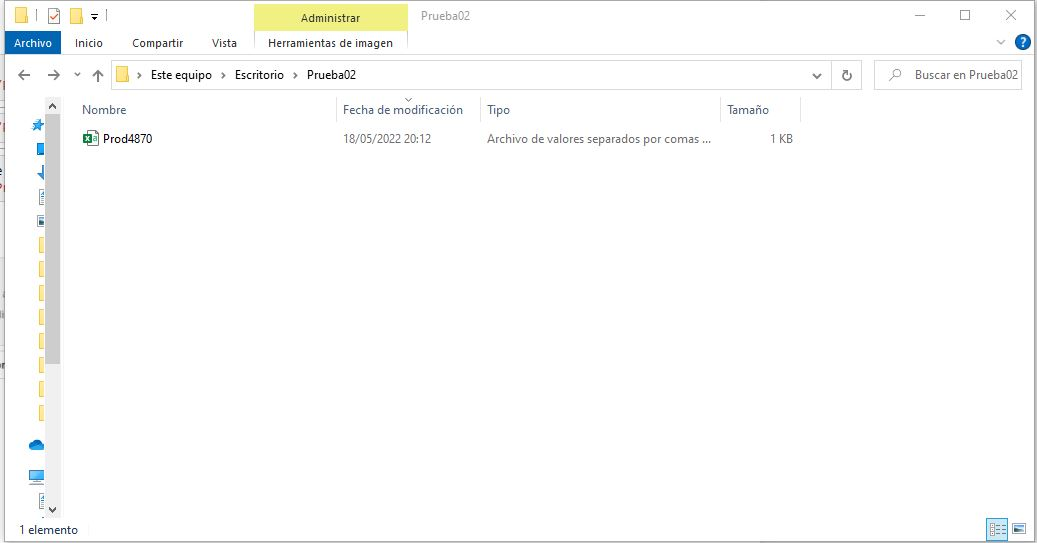

In [14]:
from IPython.display import Image
Image("C:/Users/USUARIO/Desktop/Prueba02/explor.jpg")

### Power BI
Voy a realizar una representación gráfica en Power BI para que sea más visual los productos que se han añadido al carrito conjuntamente con el producto **4870**. Se puede observar que el producto **5700037** destaca con mas de **28.300** unidades añadidas al carrito conjuntamente con el producto **4870**. Además de los otros 10 productos que también tienen grandes cantidades de veces que aparecen conjuntas con él. Siendo de utilidad estos datos para marketing digital o sugerencias en nuestra página web.

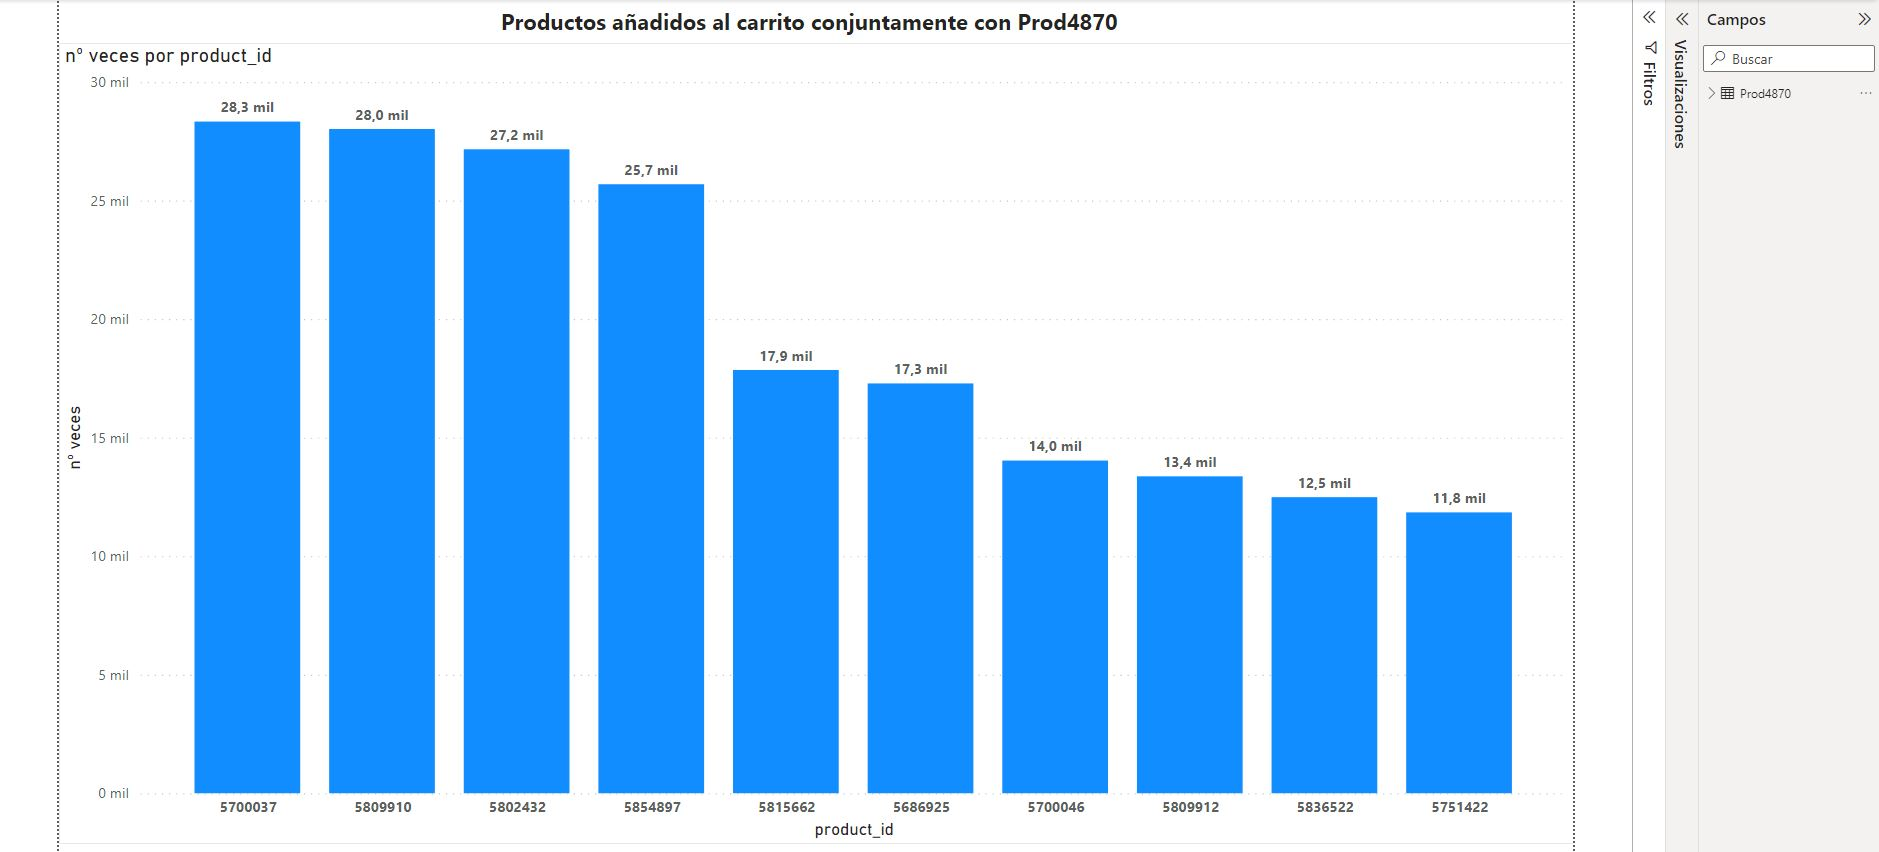

In [15]:
Image("C:/Users/USUARIO/Desktop/Prueba02/Prod4870.jpg")

 ### Automatizamos el proceso de las consultas de productos comprados conjuntamente
Como ya conozco los comandos para hacer una consulta correcta en este supuesto, ahora automatizo el proceso para ahorrar código y que sea más eficiente nuestro algoritmo. Podría crear un diccionario que almacenará todos los productos que han sido añadidos y sucesivamente consultar que 10 mejores productos han sido añadidos conjuntamente al carrito con él pero como hay **46.157 idproductos** añadidos y eso daría lugar a **46.157 archivos** en csv he preferido solo automatizar los 10 primeros idproductos para este supuesto proyecto.
De modo que he creado un diccionario que alojara solamente las id de los productos y con el cual accederé para que cambie el valor del id en nuestro bucle for para las consultas.

In [16]:
# Total de ids de productos añadidos al carrito
productos.distinct().count()

46157

In [17]:
productos_d = productos.distinct().limit(10)
productos_d.show()

+----------+
|product_id|
+----------+
|   5657304|
|   5815137|
|   5809871|
|   5834157|
|   5908237|
|   5826154|
|   5670719|
|   5900643|
|   5574996|
|   5863096|
+----------+



In [18]:
dict = {}
maximo = 10
for i in range(maximo):
    dict[i] = productos_d.collect()[i][0]
print(dict)

{0: 5657304, 1: 5815137, 2: 5809871, 3: 5834157, 4: 5908237, 5: 5826154, 6: 5670719, 7: 5900643, 8: 5574996, 9: 5863096}


In [19]:
dict[0] = 5700037 # Cambiamos un id de produccto del diccionario

In [20]:
for idproducto in dict.values():
    sesiones_2 = df2.select(['user_session']).filter((col("event_type") == 'cart') &  (col("product_id") == idproducto )).distinct()
    prod_conjunt_2 = df2.select(['product_id']).filter((col("event_type") == 'cart') &  (col("product_id") != idproducto )).filter(df2["user_session"].isin(sesiones_2["user_session"]))
    prod_conju_agrup_2 = prod_conjunt_2.groupBy('product_id').count()
    prod_conju_agrup_10 = prod_conju_agrup_2.sort(desc("count"))
    pro10 = prod_conju_agrup_10.limit(10)
    pro10.toPandas().to_csv( path + "Prod"+ str(idproducto) + ".csv", header=True)

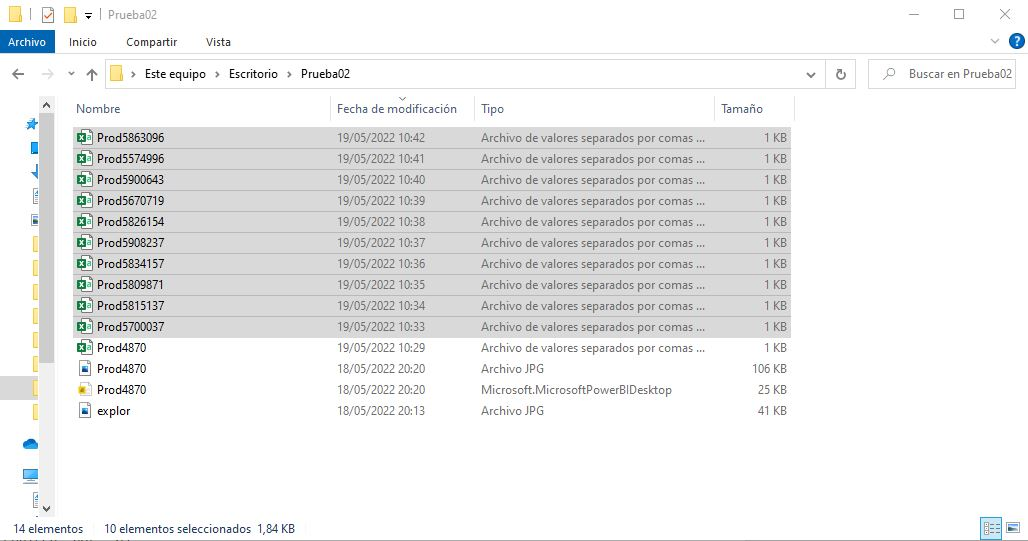

In [22]:
Image("C:/Users/USUARIO/Desktop/Prueba02/explorarch.jpg")

### Power BI
Voy a realizar una sola representación gráfica en Power BI para que sea más visual los productos que se han añadido conjuntamente al carrito con el producto **5700037**. Se puede observar que el producto **5809910** destaca con mas de **28mil** unidades añadidas conjuntamente con el producto **5700037**. Además de los otros 10 productos que también se han añadidos conjuntamente con él. Siendo de utilidad estos datos para marketing digital o sugerencias en nuestra página web.

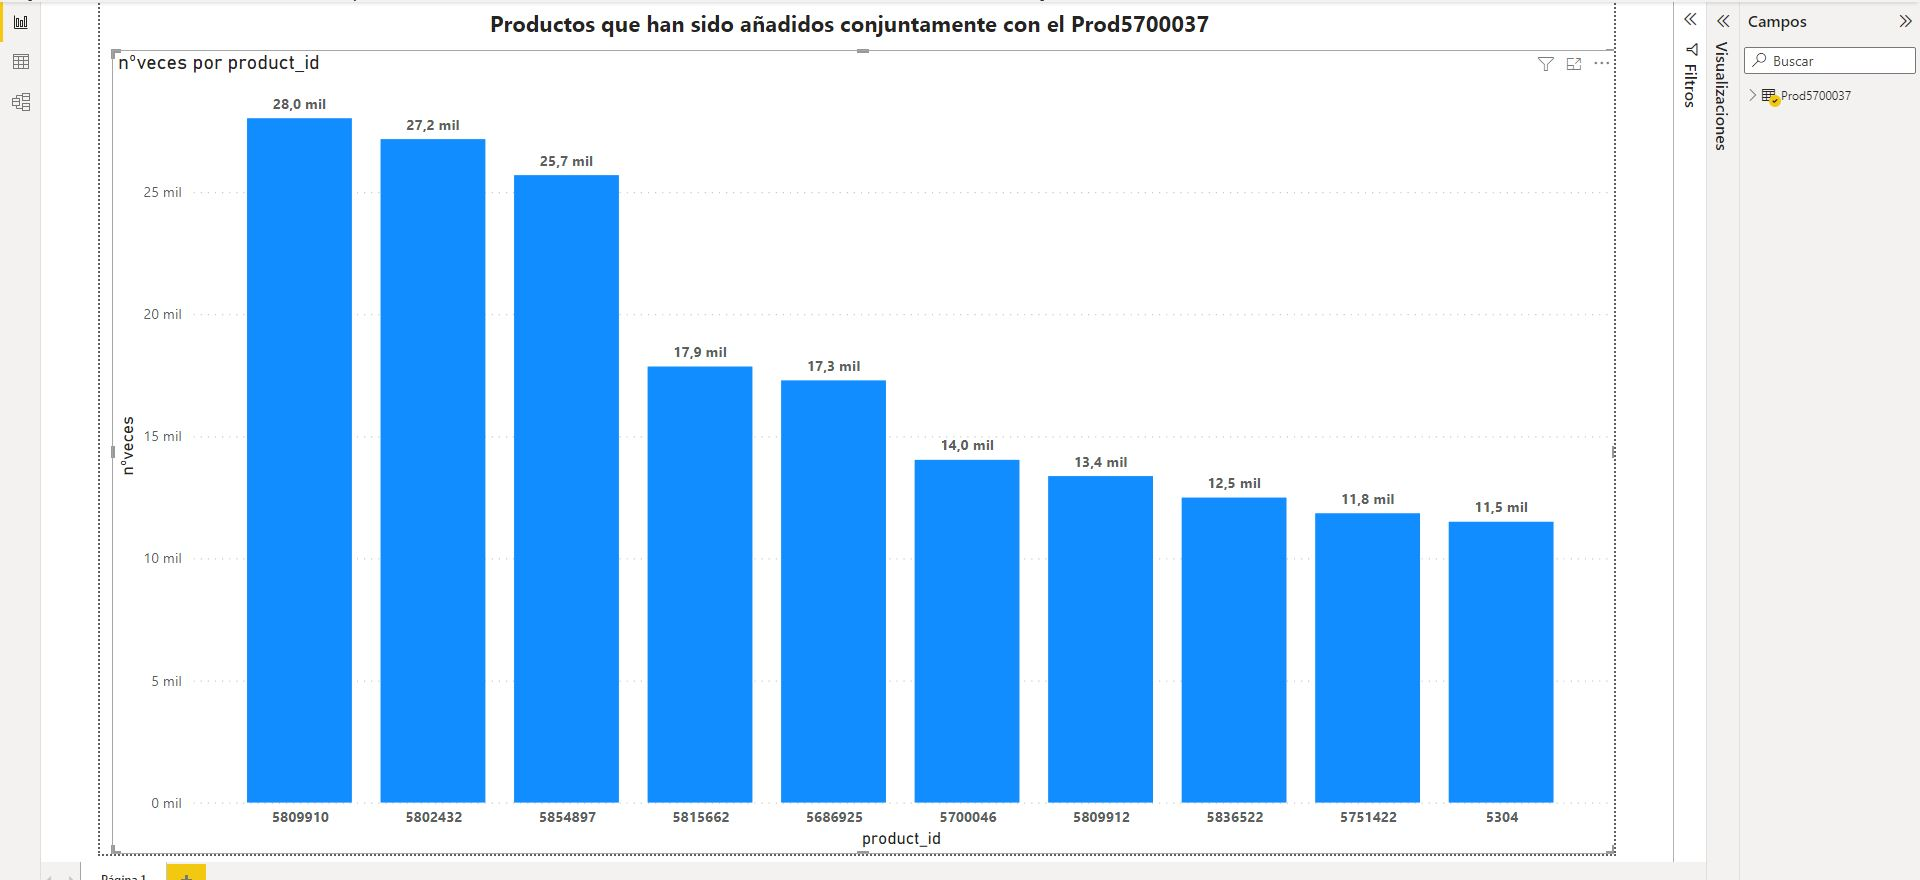

In [23]:
Image("C:/Users/USUARIO/Desktop/Prueba02/Prod5700037.jpg")